In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path= r"C:\Users\Anjelito\Documents\WORK\analysis - GDP\usd\API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3632113.csv"
df= pd.read_csv(path, skiprows= 4)

path= r"C:\Users\Anjelito\Documents\WORK\analysis - GDP\continents2.csv"
continent= pd.read_csv(path)

In [3]:
df= df.replace("Lao PDR", "Laos")

In [4]:
df.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24985.01392,24712.49326,26441.61994,26893.01151,28396.90842,28452.17061,29350.80502,30253.27936,NaN,NaN


In [5]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [6]:
# drop column country code, indicator name

column_to_drop= ['Country Code', 'Indicator Name', 'Indicator Code']

df_dropped= df.drop(column_to_drop, axis= "columns")

In [7]:
df_dropped.head(1)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24985.01392,24712.49326,26441.61994,26893.01151,28396.90842,28452.17061,29350.80502,30253.27936,NaN,NaN


In [8]:
id_vars= ['Country Name']
value_vars= ['1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

df_melted= df_dropped.melt(id_vars=id_vars, value_vars= value_vars)
df_melted= df_melted.sort_values(["Country Name", "variable"], ignore_index= True)
df_melted= df_melted.rename({"variable": "Year", "value": "GDP Per Capita (USD)"}, axis= "columns")

In [9]:
df_melted.head()

,Country Name,Year,GDP Per Capita (USD)
0,Afghanistan,1960,59.773234
1,Afghanistan,1961,59.860900
2,Afghanistan,1962,58.458009
3,Afghanistan,1963,78.706429
4,Afghanistan,1964,82.095307


In [10]:
df_melted["Year"]= df_melted["Year"].astype("int")

In [11]:
df_merged= pd.merge(left= df_melted, right= continent, how= "outer", left_on= "Country Name", right_on= "name")
df_merged= df_merged[["Country Name", "Year", "GDP Per Capita (USD)", "region"]]
df_merged.head()

,Country Name,Year,GDP Per Capita (USD),region
0,Afghanistan,1960.0,59.773234,Asia
1,Afghanistan,1961.0,59.860900,Asia
2,Afghanistan,1962.0,58.458009,Asia
3,Afghanistan,1963.0,78.706429,Asia
4,Afghanistan,1964.0,82.095307,Asia


In [12]:
df_clean= df_merged[df_merged["region"].notnull()]

In [13]:
df_clean.head()

,Country Name,Year,GDP Per Capita (USD),region
0,Afghanistan,1960.0,59.773234,Asia
1,Afghanistan,1961.0,59.860900,Asia
2,Afghanistan,1962.0,58.458009,Asia
3,Afghanistan,1963.0,78.706429,Asia
4,Afghanistan,1964.0,82.095307,Asia


## Track record

In [14]:
asean_country_no_indo= ["Brunei Darussalam", "Myanmar", "Cambodia", "Timor-Leste", "Laos", 
     "Malaysia", "Philippines", "Singapore", "Thailand", "Vietnam"]

asean_gdp_no_indo= df_clean[df_clean["Country Name"].isin(asean_country_no_indo)]

indo_gdp= df_clean[df_clean["Country Name"] == "Indonesia"]

asean_gdp= pd.concat([asean_gdp_no_indo, indo_gdp], axis= "rows")

In [84]:
xmin

1957.0

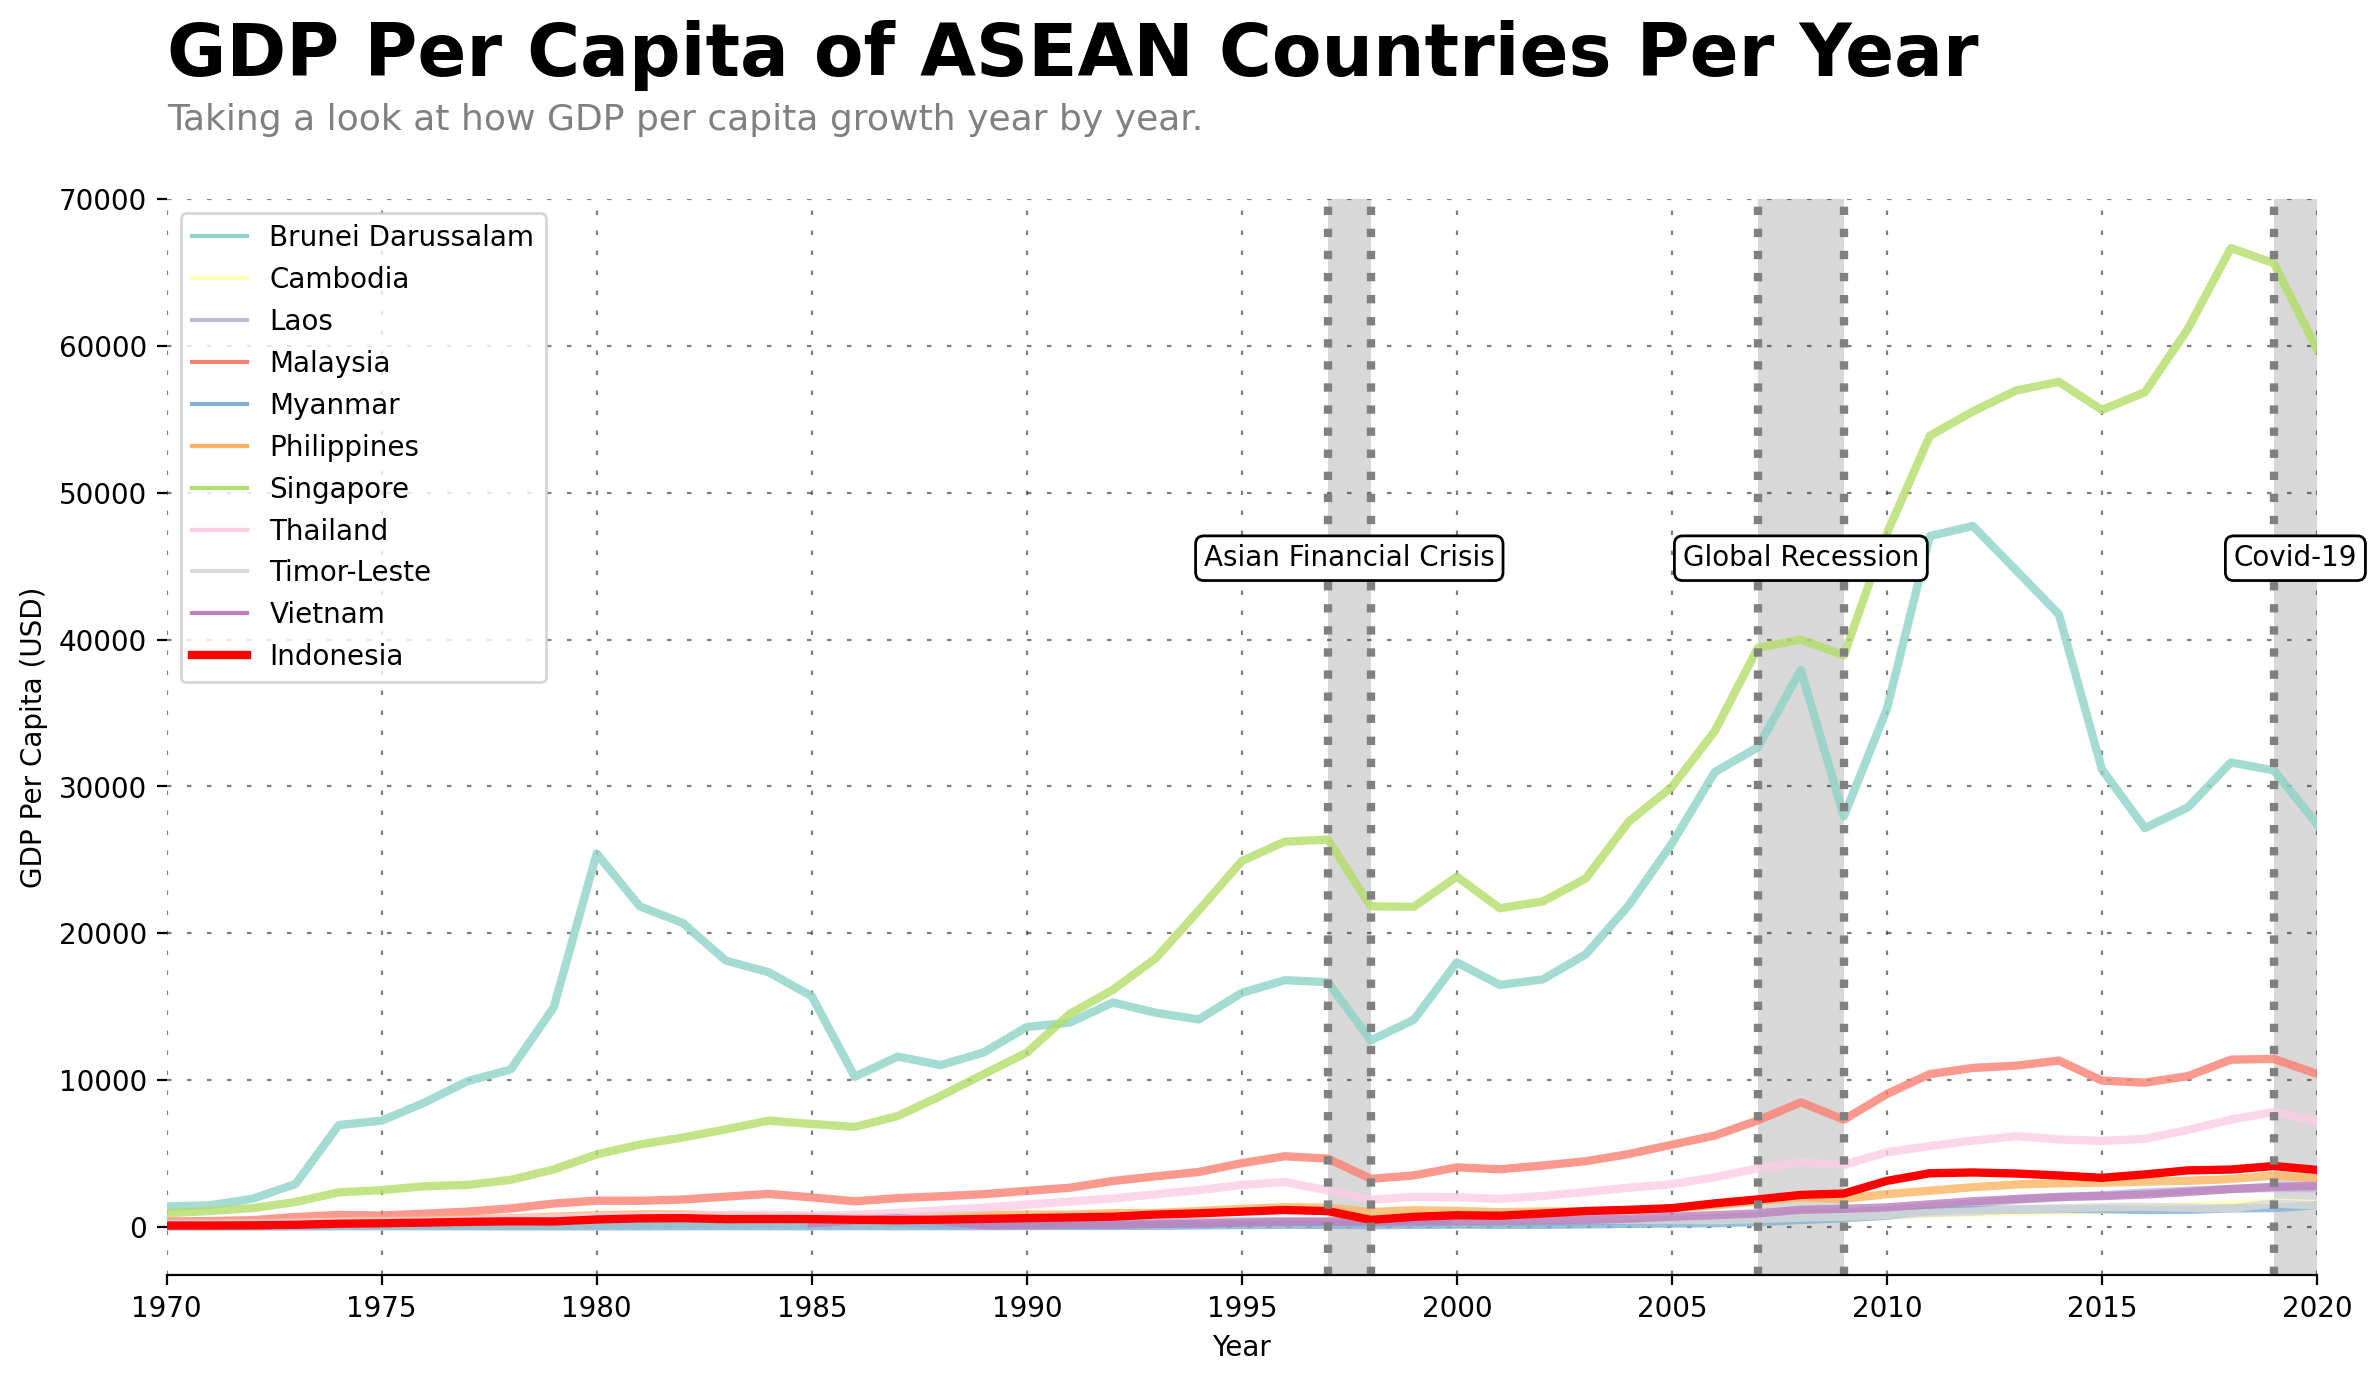

In [102]:
plt.figure(figsize=(12,7), facecolor='white', dpi= 200)
plt.grid(which='both', color='black', linestyle=':', dashes=(2,7), alpha= 0.5)

# bar
ax= sns.lineplot(x= "Year", y= "GDP Per Capita (USD)", data= asean_gdp_no_indo, hue= "Country Name", linewidth = 3, palette= "Set3", alpha= 0.8)
ax= sns.lineplot(x= "Year", y= "GDP Per Capita (USD)", data= indo_gdp, color= "red", linewidth = 3, label= "Indonesia")

# x ticks
x_ticks= list(range(1965, 2025, 5))
plt.xticks(x_ticks)
plt.xlim(1970, 2020)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# title and subtitle
plt.text(s="GDP Per Capita of ASEAN Countries Per Year", ha='left', x= xmin, y= ymax*1.12, fontsize=26, fontweight='bold')
plt.title("Taking a look at how GDP per capita growth year by year.", loc='left', fontsize=13, color= "grey", pad= 25)  

# asian fin crisis
plt.axvline(x= 1997, linestyle= ":", linewidth= 3, color= "grey")
plt.axvline(x= 1998, linestyle= ":", linewidth= 3, color= "grey")
plt.axvspan(1997, 1998, facecolor='grey', alpha=0.3)
plt.text(x= 1997.5, y= 45000, s= "Asian Financial Crisis", color='black', ha="center", fontstretch= "normal",
           alpha= 1, bbox= dict(facecolor='white', alpha=1, boxstyle="round, pad=0.3"))

# global recession
plt.axvline(x= 2007, linestyle= ":", linewidth= 3, color= "grey")
plt.axvline(x= 2009, linestyle= ":", linewidth= 3, color= "grey")
plt.axvspan(2007, 2009, facecolor='grey', alpha=0.3)
plt.text(x= 2008, y= 45000, s= "Global Recession", color='black', ha="center", fontstretch= "normal",
           alpha= 1, bbox= dict(facecolor='white', alpha=1, boxstyle="round, pad=0.3"))

# covid 19
plt.axvline(x= 2019, linestyle= ":", linewidth= 3, color= "grey")
plt.axvspan(2019, 2020, facecolor='grey', alpha=0.3)
plt.text(x= 2019.5, y= 45000, s= "Covid-19", color='black', ha="center", fontstretch= "normal",
           alpha= 1, bbox= dict(facecolor='white', alpha=1, boxstyle="round, pad=0.3"))

# spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
# plt.savefig("year_per_year_asean.png")
plt.show()

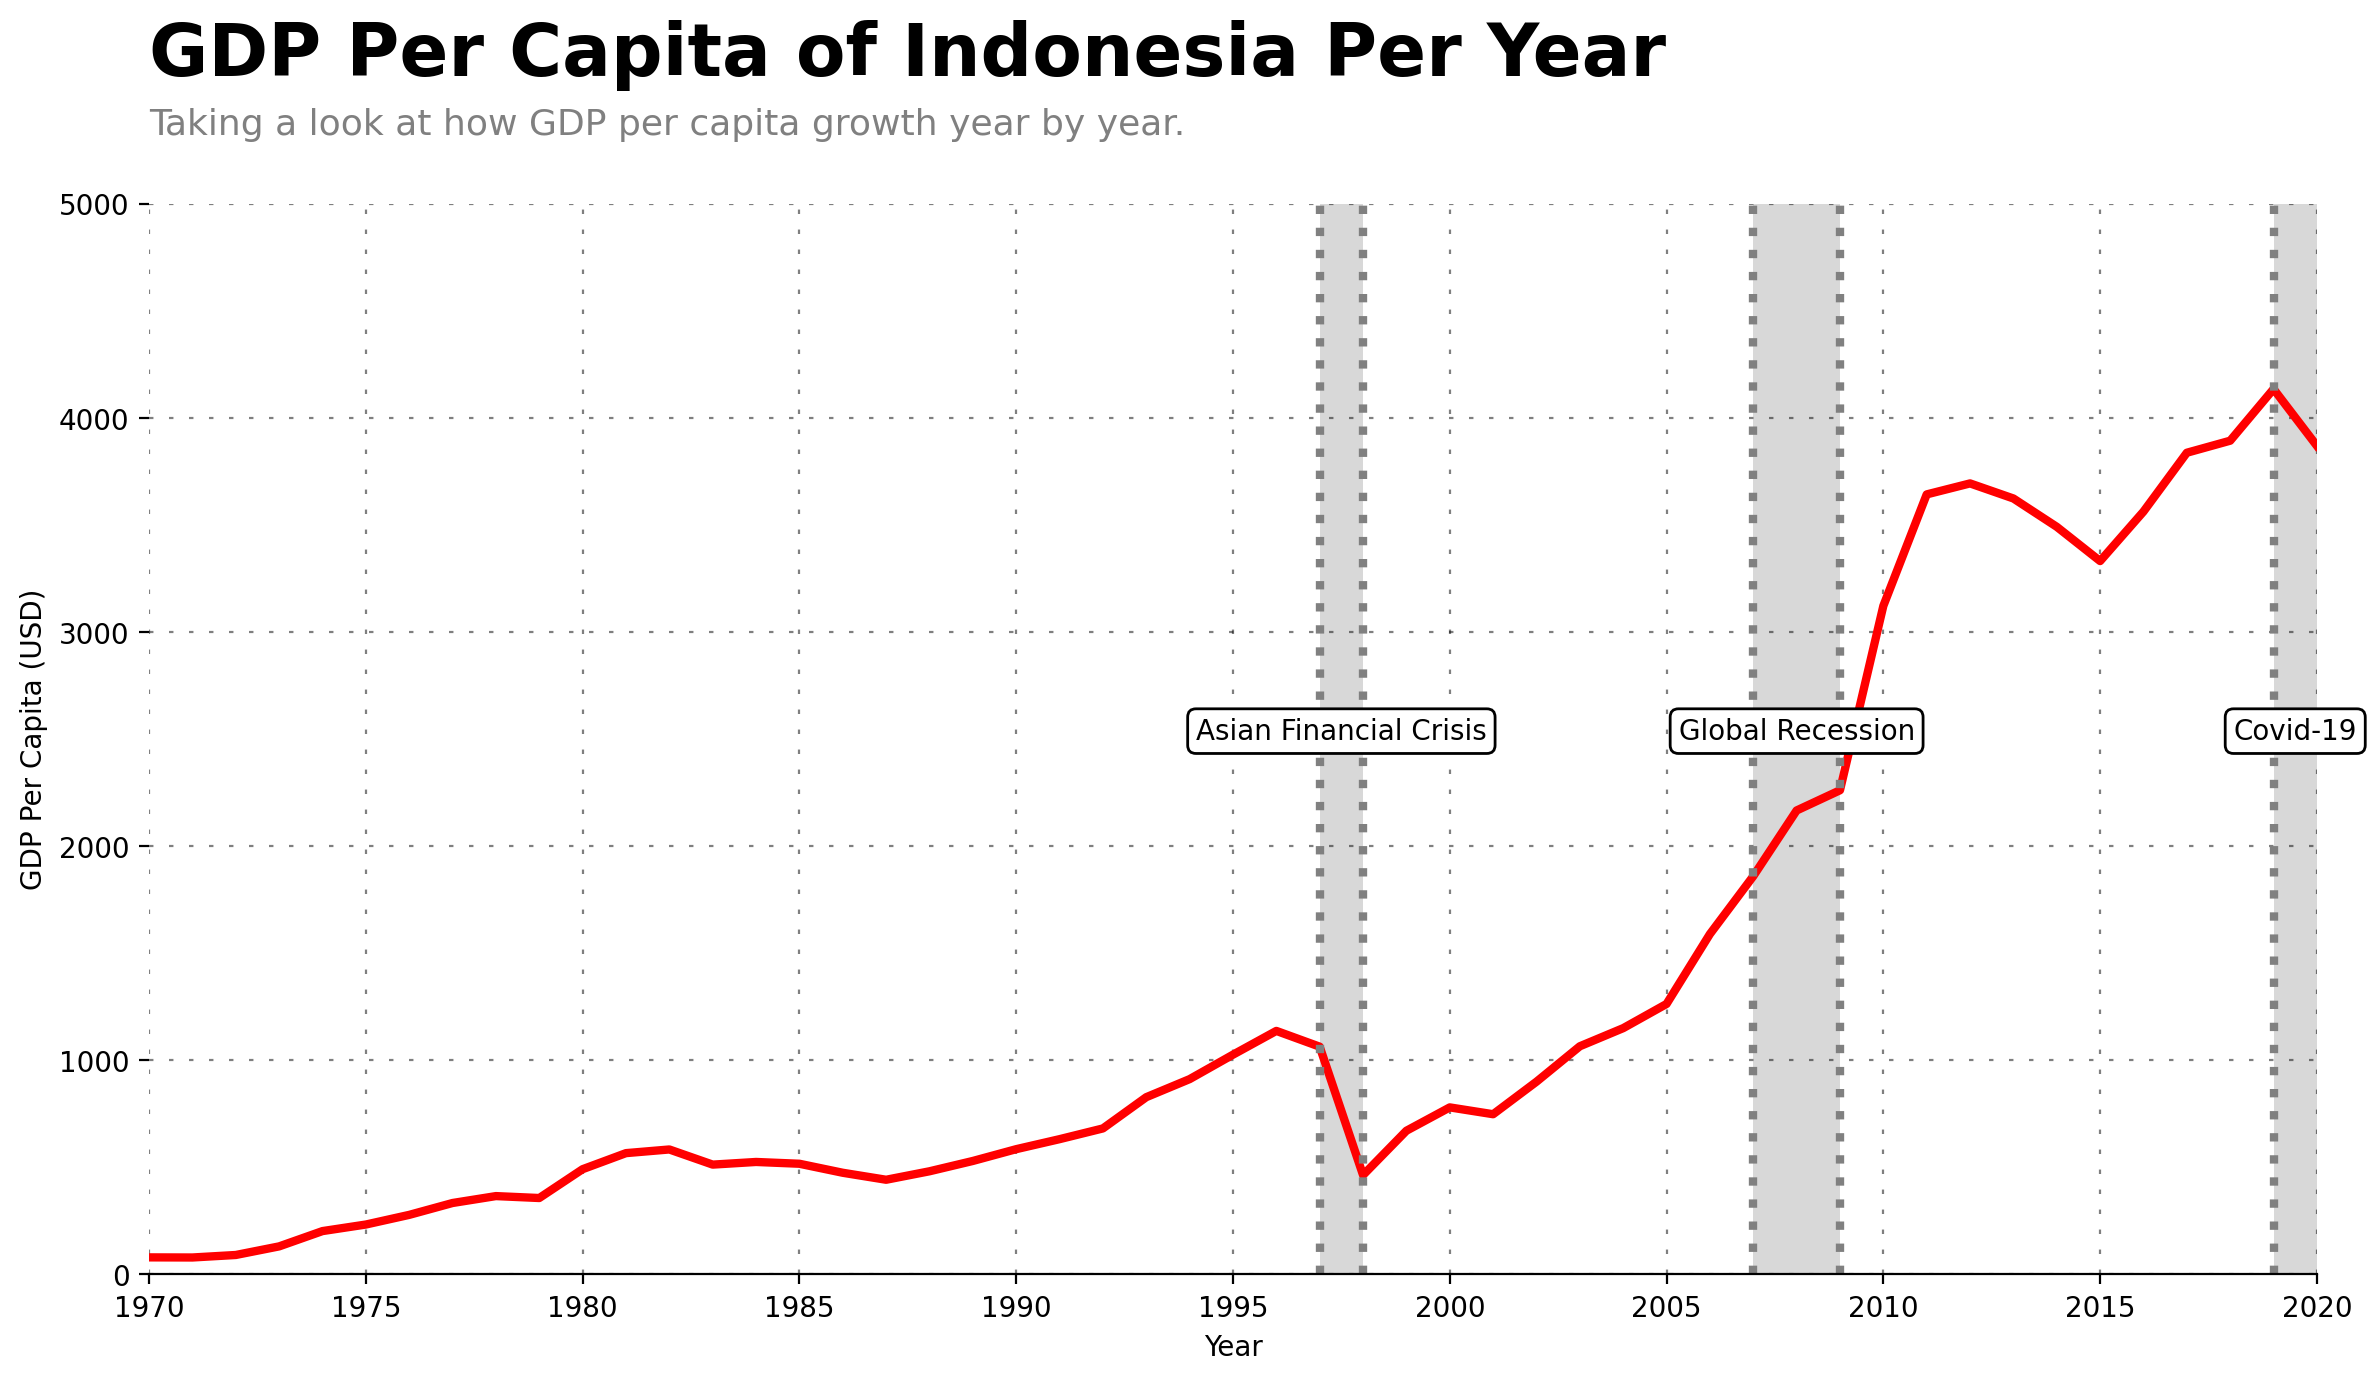

In [103]:
plt.figure(figsize=(12,7), facecolor='white', dpi= 200)
plt.grid(which='both', color='black', linestyle=':', dashes=(2,7), alpha= 0.5)

# bar
ax= sns.lineplot(x= "Year", y= "GDP Per Capita (USD)", data= indo_gdp, color= "red", linewidth = 3)

# x ticks
x_ticks= list(range(1965, 2025, 5))
plt.xticks(x_ticks)
plt.xlim(1970, 2020)
plt.ylim(0, 5000)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# title and subtitle
plt.text(s="GDP Per Capita of Indonesia Per Year", ha='left', x= xmin, y= ymax*1.12, fontsize=26, fontweight='bold')
plt.title("Taking a look at how GDP per capita growth year by year.", loc='left', fontsize=13, color= "grey", pad= 25)  

# asian fin crisis
plt.axvline(x= 1997, linestyle= ":", linewidth= 3, color= "grey")
plt.axvline(x= 1998, linestyle= ":", linewidth= 3, color= "grey")
plt.axvspan(1997, 1998, facecolor='grey', alpha=0.3)
plt.text(x= 1997.5, y= 2500, s= "Asian Financial Crisis", color='black', ha="center", fontstretch= "normal",
           alpha= 1, bbox= dict(facecolor='white', alpha=1, boxstyle="round, pad=0.3"))

# global recession
plt.axvline(x= 2007, linestyle= ":", linewidth= 3, color= "grey")
plt.axvline(x= 2009, linestyle= ":", linewidth= 3, color= "grey")
plt.axvspan(2007, 2009, facecolor='grey', alpha=0.3)
plt.text(x= 2008, y= 2500, s= "Global Recession", color='black', ha="center", fontstretch= "normal",
           alpha= 1, bbox= dict(facecolor='white', alpha=1, boxstyle="round, pad=0.3"))

# covid 19
plt.axvline(x= 2019, linestyle= ":", linewidth= 3, color= "grey")
plt.axvspan(2019, 2020, facecolor='grey', alpha=0.3)
plt.text(x= 2019.5, y= 2500, s= "Covid-19", color='black', ha="center", fontstretch= "normal",
           alpha= 1, bbox= dict(facecolor='white', alpha=1, boxstyle="round, pad=0.3"))

# spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
# plt.savefig("year_per_year_indonesia.png")
plt.show()

## ASEAN Countries

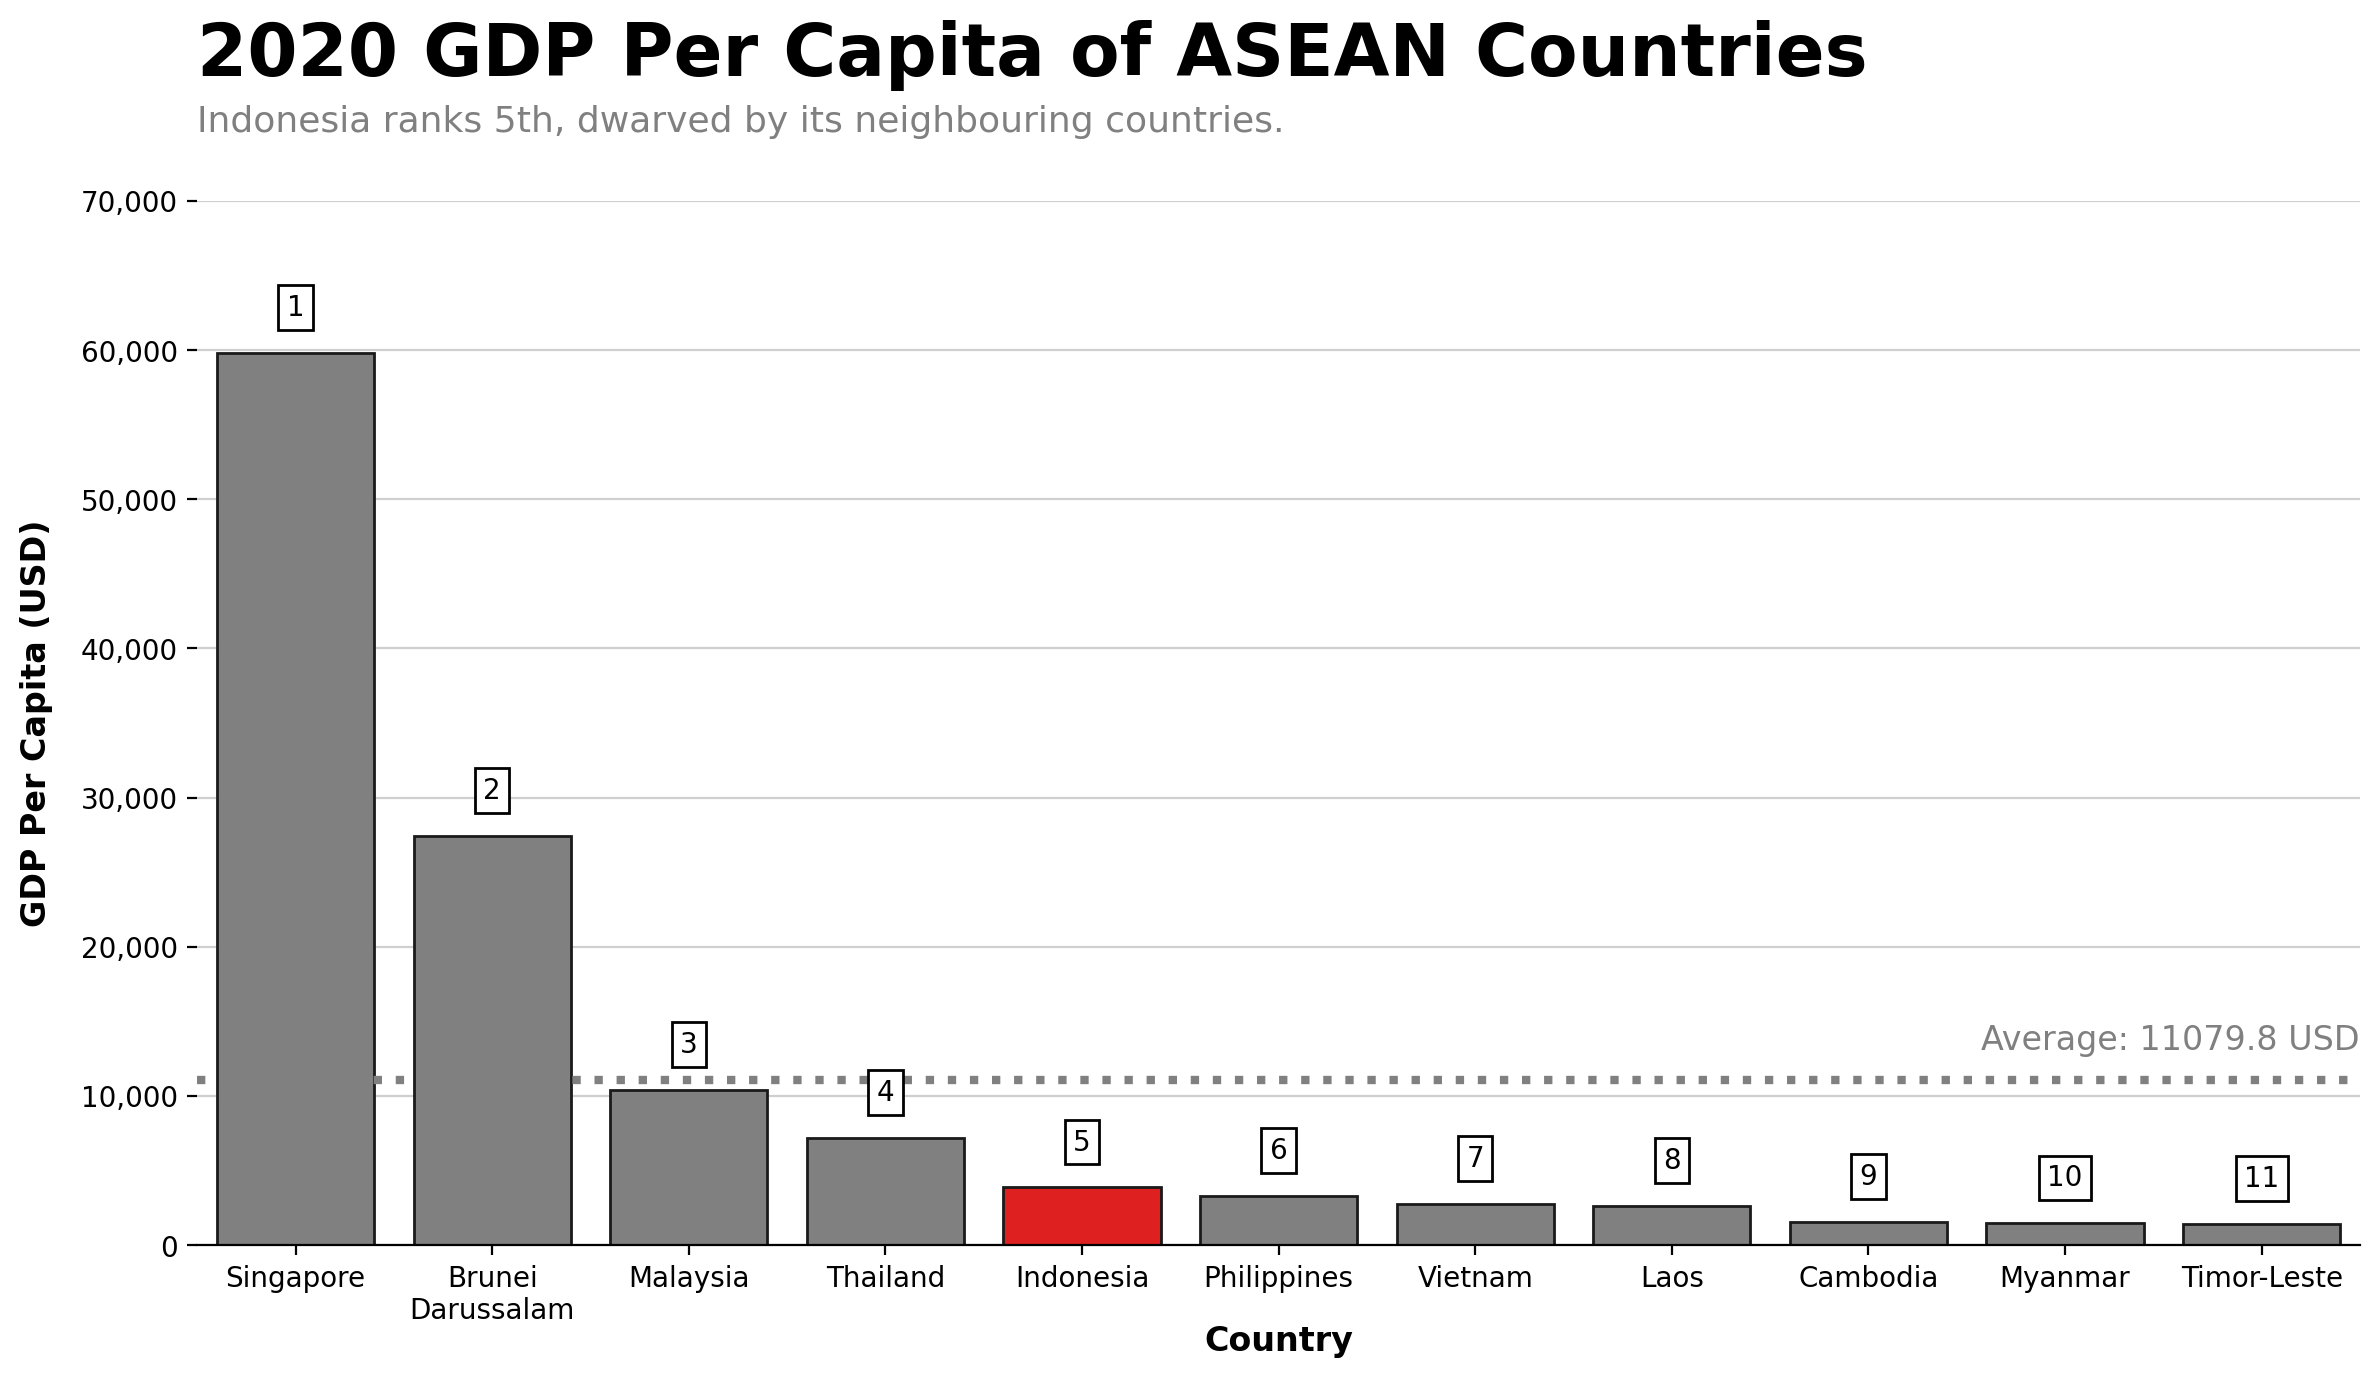

In [118]:
plt.figure(figsize=(12,7), facecolor='white', dpi= 200)

# set ylim
plt.ylim(0, 70000)

# data
data= asean_gdp[asean_gdp["Year"] == 2020].sort_values("GDP Per Capita (USD)", ascending= False).reset_index()
avg_gdp= data["GDP Per Capita (USD)"].mean()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# bar
ax= sns.barplot(data= data, x= "Country Name", y= "GDP Per Capita (USD)", edgecolor=".1", zorder= 2,
                    palette= ["grey" if x!='Indonesia' else 'red' for x in data["Country Name"]])

# average line
plt.axhline(y= avg_gdp, linestyle= ":", linewidth= 3, color= "grey")
plt.text(s= f"Average: {round(avg_gdp, 2)} USD", ha='right', x=xmax, y=avg_gdp + 2000, fontsize=12, color= "grey")

# rank label above bar
for index, row in data.iterrows():
    ax.text(x= row.name, y= row["GDP Per Capita (USD)"] + 2500, s= index+1, color='black', ha="center", fontstretch= "normal",
           alpha= 1, bbox= dict(facecolor='white', boxstyle="Square, pad=0.3"))

# text wrap for country name
import textwrap
ax.set_xticklabels([textwrap.fill(e, 11) for e in data['Country Name']])

# title and subtitle
plt.text(s="2020 GDP Per Capita of ASEAN Countries", ha='left', x=xmin, y=ymax*1.12, fontsize=26, fontweight='bold')
plt.title("Indonesia ranks 5th, dwarved by its neighbouring countries.", loc='left', fontsize=13, color= "grey", pad= 25)  

# label
ax.set_xlabel("Country", fontsize=12, labelpad=0, fontweight='bold')
ax.set_ylabel("GDP Per Capita (USD)", fontsize=12, labelpad=10, fontweight='bold')

# grid
ax.grid(axis='y', alpha=0.6, zorder=0)

# y axis ticker
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

# spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
# plt.savefig("2020_asean.png")
plt.show()

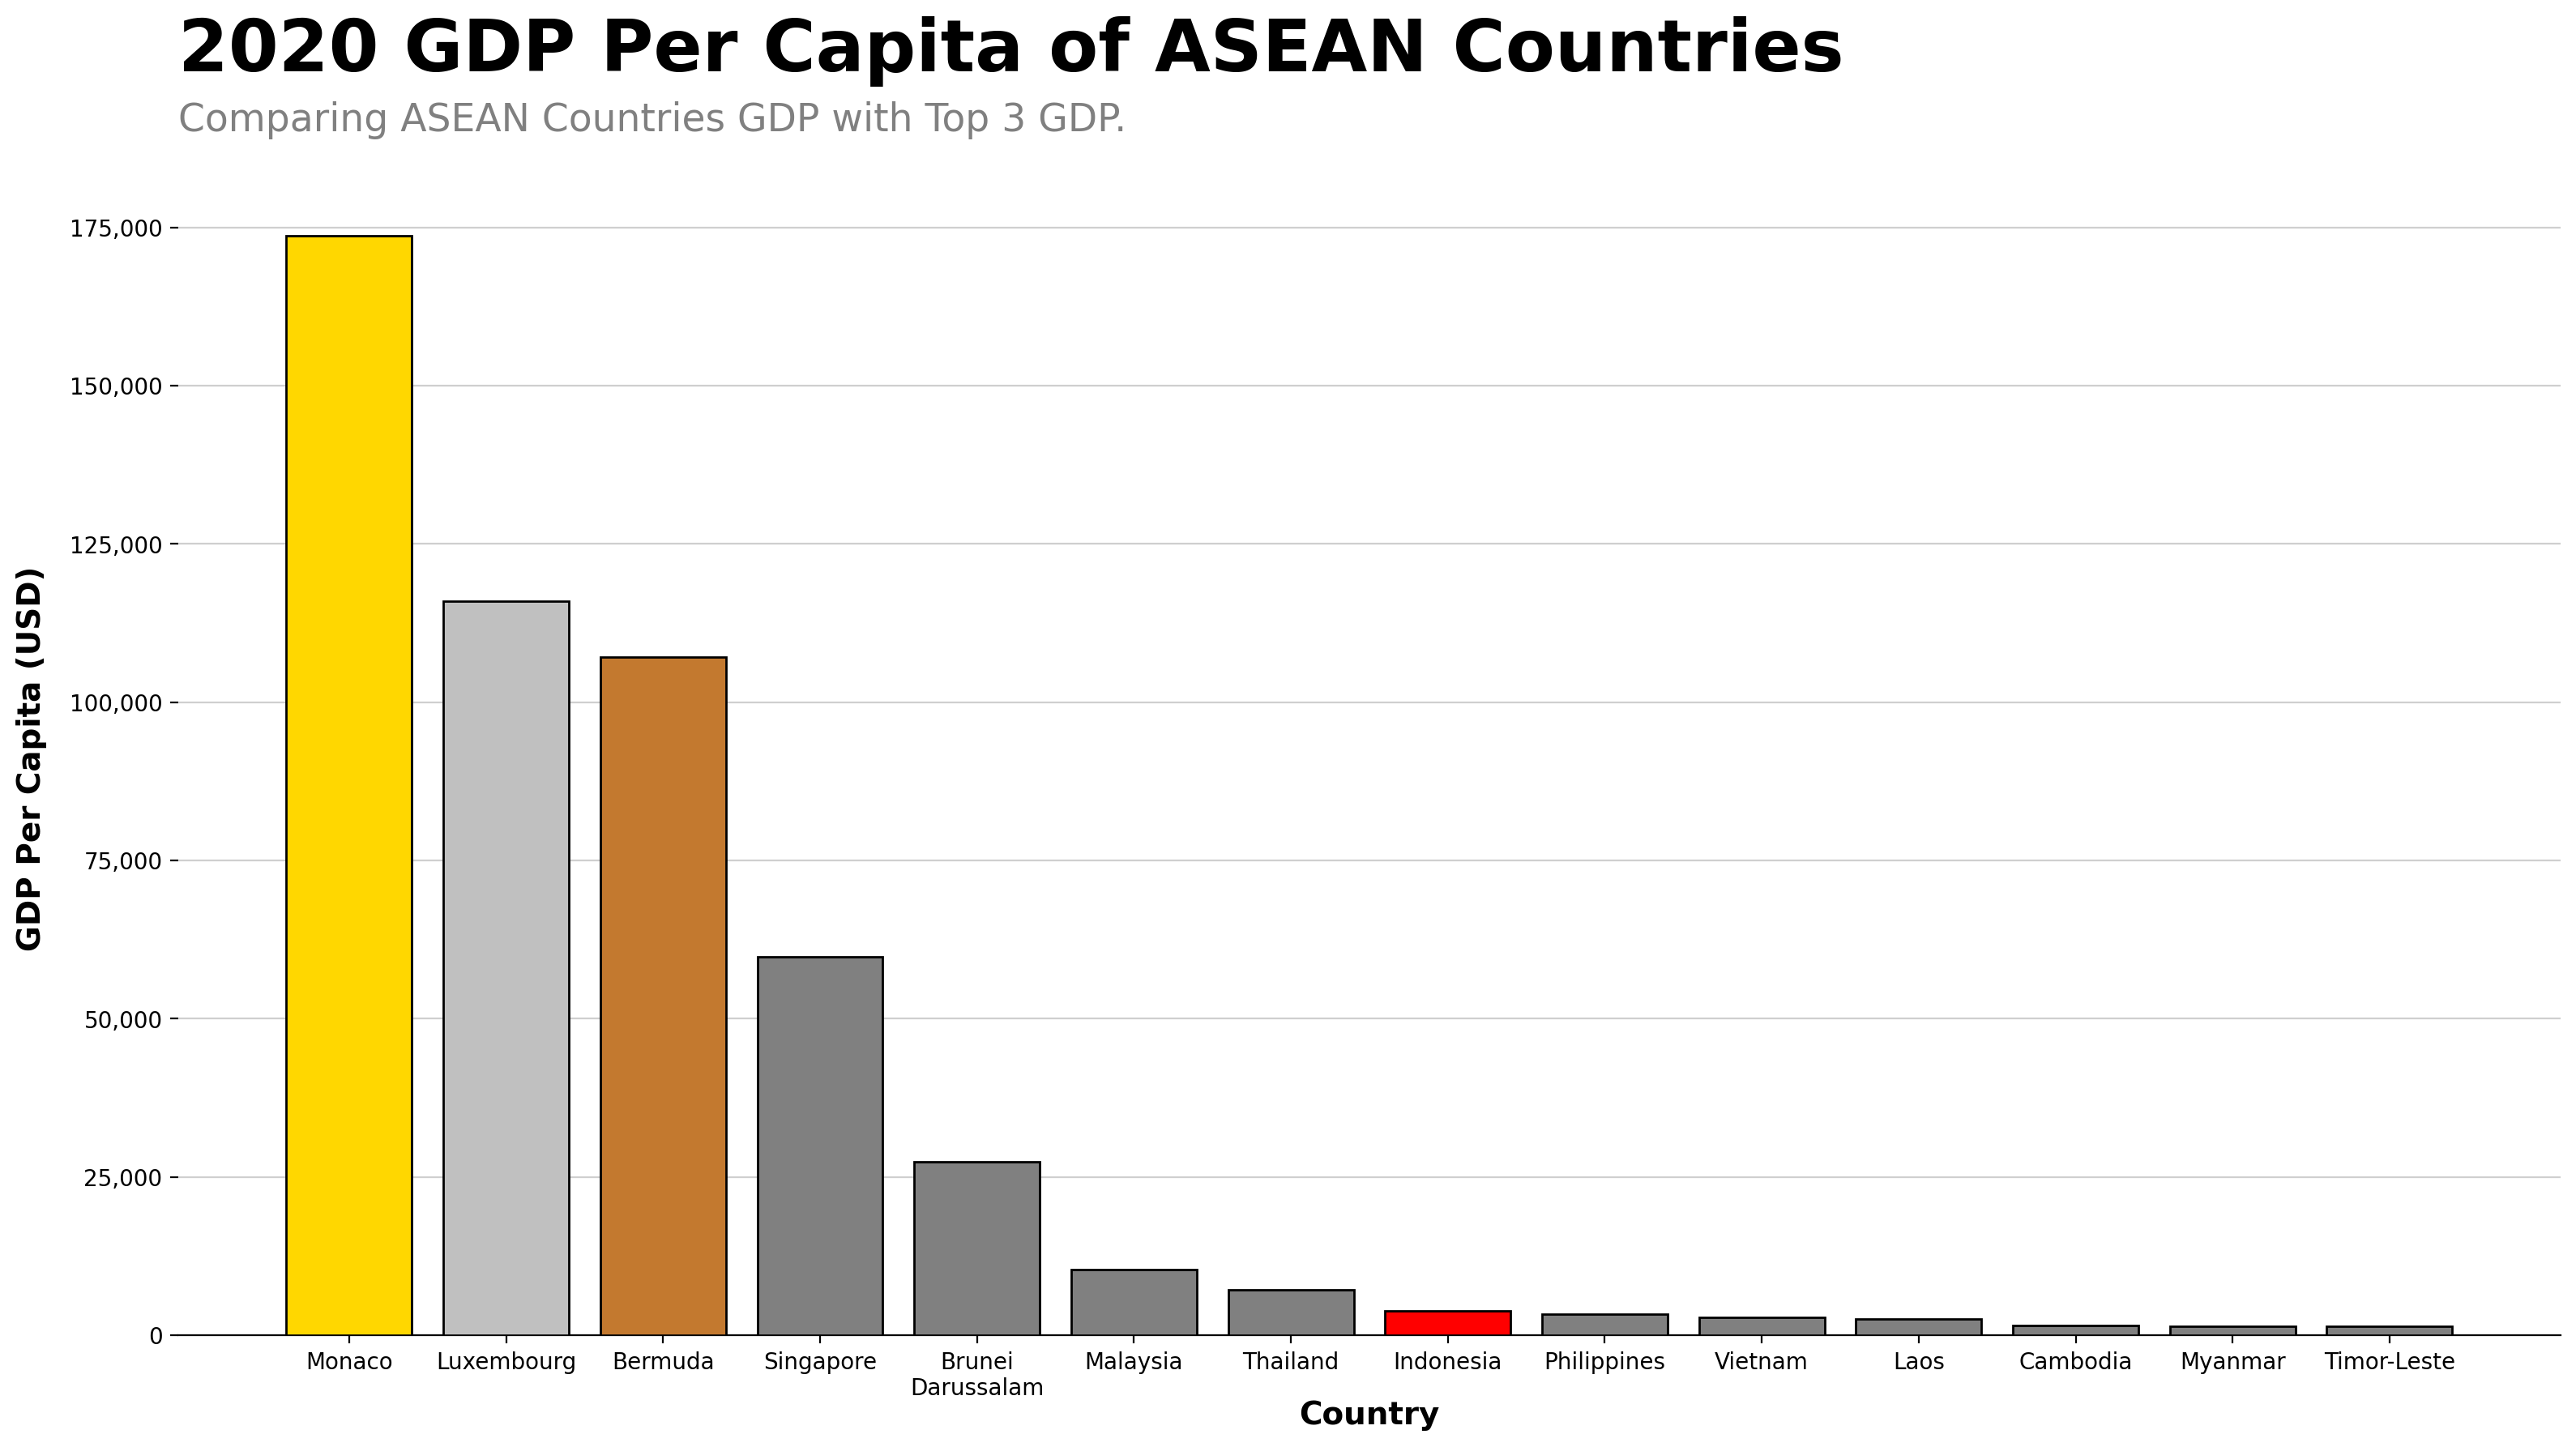

In [139]:
fig, ax = plt.subplots(figsize=(16, 9), dpi= 200)

# data
data= asean_gdp[asean_gdp["Year"] == 2020].sort_values("GDP Per Capita (USD)", ascending= False).reset_index()
data_top3= df_clean[df_clean["Year"] == 2020].sort_values("GDP Per Capita (USD)", ascending= False).reset_index().head(3)
avg_gdp= data["GDP Per Capita (USD)"].mean()

# bar
bar0= ax.bar(x= data_top3["Country Name"], height= data_top3["GDP Per Capita (USD)"], zorder= 3, 
             color= ["gold", "silver", "#c3792f"], edgecolor= "black", linewidth= 1)
bar1= ax.bar(x= data["Country Name"], height= data["GDP Per Capita (USD)"], zorder= 3, edgecolor= "black", 
             linewidth= 1, color= ["grey" if x!='Indonesia' else 'red' for x in data["Country Name"]])

# # text wrap for country name
import textwrap
ax.set_xticklabels([textwrap.fill(e, 11) for e in data_top3['Country Name']] + [textwrap.fill(e, 11) for e in data['Country Name']])

# title and subtitle
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
plt.text(s="2020 GDP Per Capita of ASEAN Countries", ha='left', x=xmin, y=ymax*1.095, fontsize=32, fontweight='bold')
plt.title("Comparing ASEAN Countries GDP with Top 3 GDP.", loc='left', fontsize=17, color= "grey", pad= 22)  

# label
ax.set_xlabel("Country", fontsize=14, labelpad=0, fontweight='bold')
ax.set_ylabel("GDP Per Capita (USD)", fontsize=14, labelpad=10, fontweight='bold')

# grid
ax.grid(axis='y', alpha=0.6, zorder=0)

# spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# y axis ticker
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
# plt.savefig("2020_asean_top_3.png", facecolor='white', transparent=False)
plt.show()

## Continent

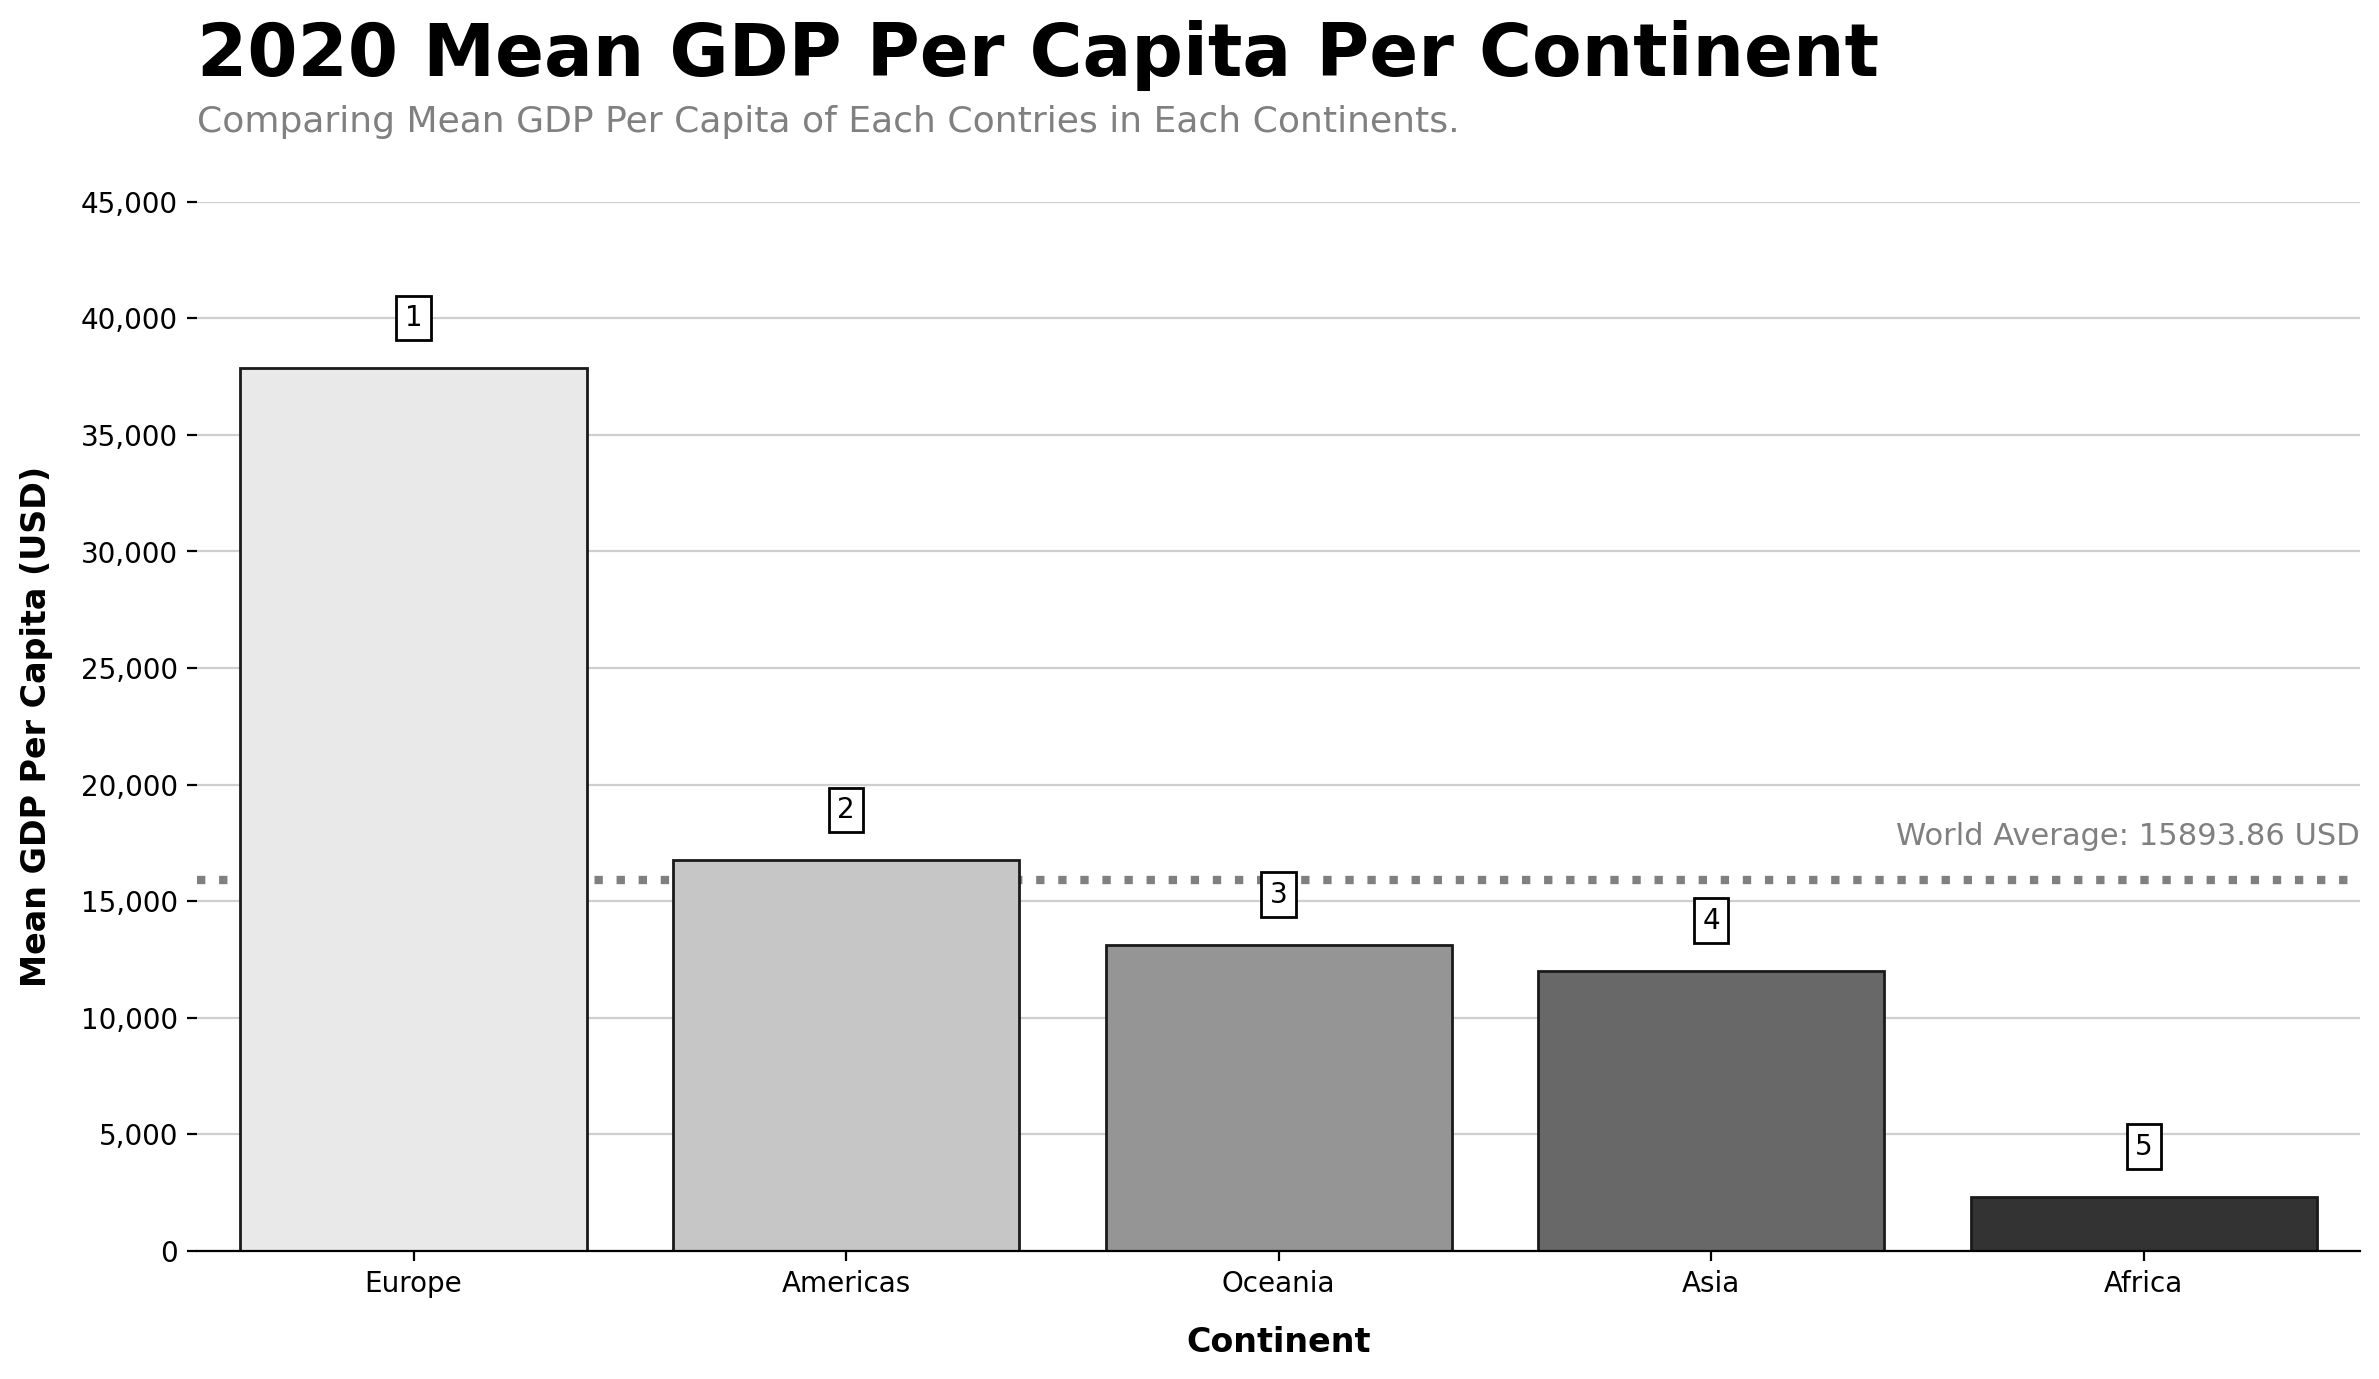

In [127]:
plt.figure(figsize=(12,7), facecolor='white', dpi= 200)

# data
df_2020= df_clean[df_clean["Year"] == 2020]
df_2020_continent= df_2020.groupby("region").mean().sort_values("GDP Per Capita (USD)", ascending= False).reset_index()
avg_gdp= df_2020["GDP Per Capita (USD)"].mean()

# set ylim
plt.ylim(0, 45000)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#bar
ax= sns.barplot(data= df_2020_continent, x= "region", y= "GDP Per Capita (USD)", edgecolor=".1", zorder= 2, palette= "Greys")

# average line
plt.axhline(y= avg_gdp, linestyle= ":", linewidth= 3, color= "grey", zorder= 0)
plt.text(s= f"World Average: {round(avg_gdp, 2)} USD", ha='right', x= xmax, y=avg_gdp + 1500, fontsize= 11, color= "grey")

# rank label above bar
for index, row in df_2020_continent.iterrows():
    ax.text(x= row.name, y= row["GDP Per Capita (USD)"] + 1800, s= index+1, color='black', ha="center", fontstretch= "normal",
           alpha= 1, bbox= dict(facecolor='white', boxstyle="Square, pad=0.3"))

# title and subtitle
plt.text(s="2020 Mean GDP Per Capita Per Continent", ha='left', x=xmin, y=ymax*1.12, fontsize=26, fontweight='bold')
plt.title("Comparing Mean GDP Per Capita of Each Contries in Each Continents.", loc='left', fontsize=13, color= "grey", pad= 25)  

# label
ax.set_xlabel("Continent", fontsize=12, labelpad=10, fontweight='bold')
ax.set_ylabel("Mean GDP Per Capita (USD)", fontsize=12, labelpad=10, fontweight='bold')

# grid
ax.grid(axis='y', alpha=0.6, zorder=0)

# y axis ticker
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

# spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
# plt.savefig("continent.png")

plt.show()